In [73]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [5]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [6]:
legacy_desktop = example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }

legacy_mobile = example_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2007120100",
                # for end use 1st day of month following final month of data
                 "end" : "2016080100"
                    }
pageviews_desktop = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2015070100",
                    # for end use 1st day of month following final month of data
                    "end" : '2020101000'
                        }

pageviews_app = {"project" : "en.wikipedia.org",
                "access" : "mobile-app",
                "agent" : "user",
                "granularity" : "monthly",
                "start" : "2015070100",
                # for end use 1st day of month following final month of data
                "end" : '2020101000'
                    }

pageviews_web = {"project" : "en.wikipedia.org",
                "access" : "mobile-web",
                "agent" : "user",
                "granularity" : "monthly",
                "start" : "2015070100",
                # for end use 1st day of month following final month of data
                "end" : '2020101000'
                    }

headers = {'User-Agent': 'https://github.com/qye25',
        'From': 'qye25@uw.edu'
}

In [7]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [10]:
def saveJSON(filename, endpoint,parameters):
    response = api_call(endpoint,parameters)
    with open(filename+".json", 'w') as json_file:
        json.dump(response, json_file)

In [11]:

# saveJSON("pagecounts_desktop-site_200712-201607",endpoint_legacy, legacy_desktop)
# saveJSON("pagecounts_mobile-site_200712-201607",endpoint_legacy, legacy_mobile)

# saveJSON("pageviews_desktop_201507-202009",endpoint_pageviews, pageviews_desktop)
# saveJSON("pageviews_mobile-app_201507-202009",endpoint_pageviews, pageviews_app)
# saveJSON("pageviews_mobile-web_201507-202009",endpoint_pageviews, pageviews_web)

In [20]:
# data = json.loads("pagecounts_desktop-site_200712-201607.json")
with open('pagecounts_desktop-site_200712-201607.json') as f:
  data = json.load(f)
pagecounts_desktop_site = pd.DataFrame(data['items'])

with open('pagecounts_mobile-site_200712-201607.json') as f:
  data = json.load(f)
pagecounts_mobile_site = pd.DataFrame(data['items'])

with open('pageviews_desktop_201507-202009.json') as f:
  data = json.load(f)
pageviews_desktop = pd.DataFrame(data['items'])

with open('pageviews_mobile-app_201507-202009.json') as f:
  data = json.load(f)
pageviews_mobile_app = pd.DataFrame(data['items'])

with open('pageviews_mobile-web_201507-202009.json') as f:
  data = json.load(f)
pageviews_mobile_web = pd.DataFrame(data['items'])

In [40]:
for table in [pagecounts_desktop_site, pagecounts_mobile_site, pageviews_desktop, pageviews_mobile_app, pageviews_mobile_web]:
    table['year'] = table['timestamp'].apply(lambda x : x[:4])
    table['month'] = table['timestamp'].apply(lambda x : x[4:6])

In [99]:
df = pagecounts_desktop_site[['year','month','count']]
df = df.merge(pagecounts_mobile_site[['year','month','count']], on=('year', 'month'), how = 'outer', suffixes=('_pagecount_desktop_views', '_pagecount_mobile_views'))

df = df.merge(pageviews_desktop[['year','month','views']], on=('year', 'month'), how = 'outer')

df = df.merge(pageviews_mobile_app[['year','month','views']], on=('year', 'month'), how = 'outer')

df = df.merge(pageviews_mobile_web[['year','month','views']], on=('year', 'month'), how = 'outer')

df.columns = ['year','month','pagecount_desktop_views', 'pagecount_mobile_views' , 'pageviews_desktop_views', 'pageviews_mobile_app', 'pageviews_mobile_web']

df['pagecount_all_views'] = df['pagecount_desktop_views']+df['pagecount_mobile_views']

df['pageviews_mobile_views'] = df['pageviews_mobile_app']+df['pageviews_mobile_web']
df['pageview_all_views'] = df['pageviews_mobile_views']+df['pageviews_desktop_views']

df = df.drop(columns=['pageviews_mobile_app', 'pageviews_mobile_web'])


In [94]:
df.fillna(0).to_csv('en-wikipedia_traffic_200712-201809.csv')
df

,year,month,pagecount_desktop_views,pagecount_mobile_views,pageviews_desktop_views,pagecount_all_views,pageviews_mobile,pageview_all_views
0,2007,12,2.998332e+09,NaN,NaN,NaN,NaN,NaN
1,2008,01,4.930903e+09,NaN,NaN,NaN,NaN,NaN
2,2008,02,4.818394e+09,NaN,NaN,NaN,NaN,NaN
3,2008,03,4.955406e+09,NaN,NaN,NaN,NaN,NaN
4,2008,04,5.159162e+09,NaN,NaN,NaN,NaN,NaN
5,2008,05,5.584691e+09,NaN,NaN,NaN,NaN,NaN
6,2008,06,5.712104e+09,NaN,NaN,NaN,NaN,NaN
7,2008,07,5.306303e+09,NaN,NaN,NaN,NaN,NaN
8,2008,08,5.140156e+09,NaN,NaN,NaN,NaN,NaN
9,2008,09,5.479534e+09,NaN,NaN,NaN,NaN,NaN


In [100]:
df.set_index(pd.to_datetime({
    'day': 1,
    'month': df['month'],
    'year': df['year']
}), inplace=True)
# df.Value.plot()
# plt.plot_date( df['year'], df['pageview_all_views'])

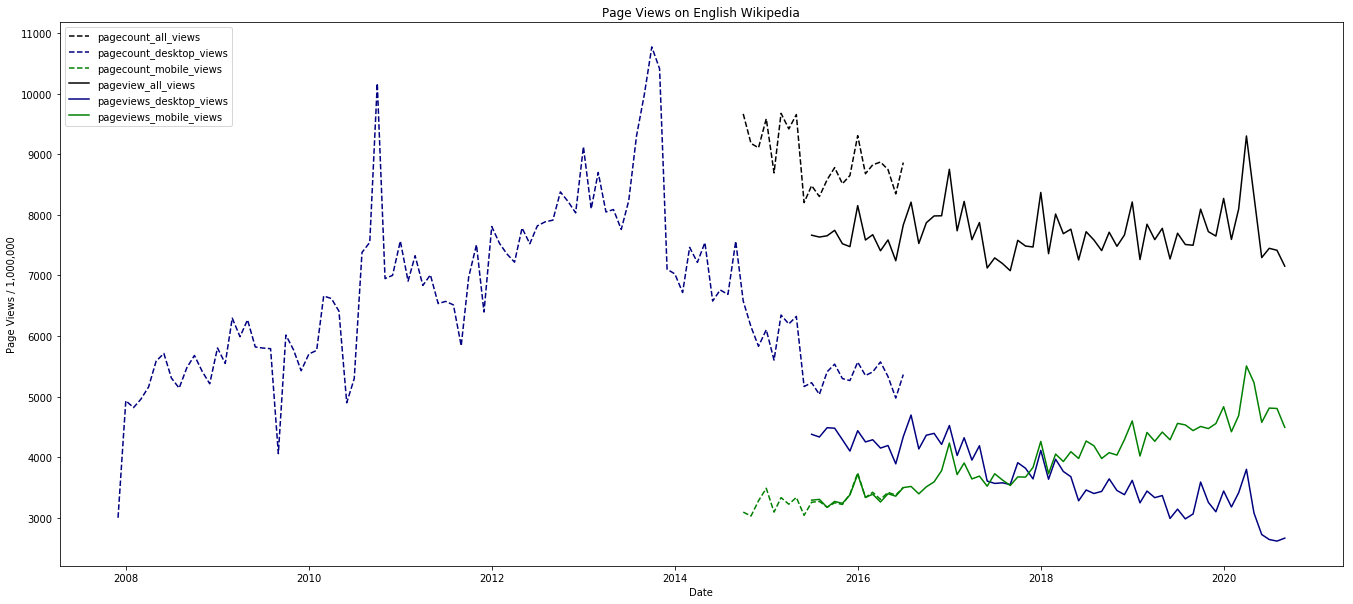

In [105]:
plt.figure(figsize=(23,10))
plt.plot(df.pagecount_all_views / 1000000, '--', color = 'black')
plt.plot(df.pagecount_desktop_views / 1000000, '--', color = 'navy')
plt.plot(df.pagecount_mobile_views / 1000000, '--', color = 'green')
plt.plot(df.pageview_all_views / 1000000, color = 'black')
plt.plot(df.pageviews_desktop_views / 1000000, color = 'navy')
plt.plot(df.pageviews_mobile_views / 1000000, color = 'green')
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Page Views / 1,000,000')
# plt.lim((0,))
plt.title('Page Views on English Wikipedia')
plt.savefig('Page Views on English Wikipedia.png')